In [147]:
import os
import pandas as pd

import torch
import torch.nn as nn
import numpy as np

import warnings
warnings.filterwarnings(action='ignore') 

In [148]:
%cd /workspace/EmotionShortForm

/workspace/EmotionShortForm


In [232]:
# wav 파일의 MFCC Feature와 상태정보를 합친 학습데이터를 불러옵니다.
train_df = pd.read_csv('preprocessing_csv/train_mfcc_data.csv')
test_df = pd.read_csv('preprocessing_csv/test_mfcc_data.csv')

In [233]:
train_df

,Unnamed: 0,SegmentId,time,Emotion,Valence,Arousal,mfcc_1,mfcc_2,mfcc_3,mfcc_4,...,mfcc_23,mfcc_24,mfcc_25,mfcc_26,mfcc_27,mfcc_28,mfcc_29,mfcc_30,mfcc_31,mfcc_32
0,11164,Sess26_script04_User052F_010,7.785990,neutral,3.0,3.5,-379.964142,109.689522,8.409287,14.947894,...,-0.390324,2.626545,0.437545,2.089825,0.171152,5.063381,3.834727,1.973997,-3.659752,-1.247434
1,13031,Sess24_script03_User047F_009,12.188990,happy,3.4,3.6,-316.165100,96.198570,-13.874292,23.989883,...,2.732685,5.995924,5.040682,8.586355,6.141405,8.720468,8.573661,10.320451,7.674820,4.114799
2,1147,Sess09_script01_User018M_030,4.147000,neutral,2.6,3.1,-354.932220,124.622856,13.342740,26.263084,...,-0.242917,0.397124,4.878927,5.264405,2.994150,2.870259,0.314687,2.809367,-0.628893,3.489642
3,6435,Sess14_script02_User028M_002,1.556999,neutral,3.6,3.1,-385.279846,118.912277,13.351930,38.183296,...,2.936629,-0.579203,-1.418086,2.701938,-0.128480,-0.650981,0.222955,1.449542,-1.601669,-0.025312
4,7053,Sess32_script01_User064F_049,5.443000,neutral,3.0,3.5,-351.163513,109.502029,4.125424,35.244442,...,3.420357,6.290679,3.681709,5.164492,3.685917,7.506263,7.469996,7.370858,6.551222,5.917849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10764,5191,Sess03_script03_User005M_032,3.847000,neutral,3.2,3.3,-307.079376,110.748199,3.071705,26.098019,...,-4.210361,-1.421704,-2.658003,1.054526,-3.188072,0.515963,0.066960,0.752482,-1.321549,-3.410846
10765,13418,Sess22_script06_User043F_006,5.639000,angry,2.6,3.7,-239.924500,72.984070,-18.580250,-6.845965,...,6.675857,10.649000,7.589522,8.607011,2.216211,7.668085,-0.767406,2.716651,-3.422506,4.849663
10766,5390,Sess12_script01_User081F_018,3.157000,happy;neutral,3.7,3.6,-333.780945,95.989861,-14.832805,15.677377,...,-3.285286,1.564119,6.515084,10.374402,8.091890,14.184700,12.203178,19.104069,6.390728,4.591437
10767,860,Sess19_script02_User037M_002,6.590000,neutral,2.6,3.3,-339.677338,118.469772,10.663605,37.051121,...,-0.823455,1.826434,-0.563071,3.543955,-0.973314,3.040696,3.090068,4.243995,0.834076,1.139718


In [234]:
test_df

,Unnamed: 0,SegmentId,time,Emotion,Valence,Arousal,mfcc_1,mfcc_2,mfcc_3,mfcc_4,...,mfcc_23,mfcc_24,mfcc_25,mfcc_26,mfcc_27,mfcc_28,mfcc_29,mfcc_30,mfcc_31,mfcc_32
0,63,Sess13_script01_User026F_029,7.254990,happy,3.7,3.5,-336.985138,106.803337,4.534938,10.542789,...,3.775362,8.967966,8.074034,11.653221,11.598641,8.817598,9.400865,8.987887,5.992146,4.622094
1,5163,Sess03_script03_User005M_021,2.212000,surprise,2.9,3.4,-337.904297,105.446899,11.310282,24.076952,...,0.827898,-4.050204,-3.444622,-0.045880,-2.624972,-0.375320,-1.709600,-1.171931,-4.099090,-1.587989
2,7844,Sess23_script02_User046M_022,9.281020,neutral,2.3,3.0,-419.555511,125.555763,18.391697,30.752876,...,-4.389714,-3.478583,-2.749439,1.098240,1.010692,0.460480,-1.992547,1.084825,-0.576132,0.662649
3,304,Sess13_script05_User026F_017,6.614991,happy,4.4,4.2,-261.221222,108.892136,-26.196730,9.421447,...,7.680419,13.833956,7.379666,8.362466,1.706965,5.596114,5.339090,5.811155,1.621077,3.745970
4,5216,Sess03_script04_User005M_008,3.404998,angry,1.6,3.2,-346.095032,101.206184,21.618317,20.990105,...,-1.431287,-0.532429,-1.102016,1.010110,-1.844896,-1.788239,0.140551,-2.089751,-1.204731,-1.450962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2688,8873,Sess39_script05_User078F_007,4.404998,neutral,3.0,3.0,-452.831024,80.856758,19.427954,32.913322,...,-0.777822,1.763288,2.534321,1.811994,4.191569,6.094894,5.072481,7.664765,4.959315,4.205091
2689,11974,Sess37_script05_User073F_012,6.781000,neutral,2.6,3.2,-450.678375,98.769257,-4.727075,7.584974,...,-0.527370,3.983363,4.685560,2.902997,0.235584,2.744654,1.443039,5.997917,3.257085,5.762399
2690,10559,Sess33_script04_User065M_028,3.066020,neutral,3.4,3.4,-371.517609,117.556679,5.498871,27.535383,...,-3.194983,-1.782557,-2.510203,-2.095202,-3.341051,-1.580801,-0.980542,0.799156,-2.367372,0.982645
2691,3076,Sess02_script02_User003F_001,12.123001,neutral,2.4,2.6,-375.577759,106.716896,2.852894,26.215828,...,1.205008,4.127676,8.754350,5.358984,4.600071,9.529908,5.941333,14.158734,8.534500,10.391392


In [235]:
# 학습데이터를 모델의 input으로 들어갈 x와 label로 사용할 y로 분할
train_x_df = train_df.drop(columns=['Unnamed: 0', 'SegmentId','time','Valence','Arousal','Emotion'])
train_y_df = train_df['Arousal']
test_x_df = test_df.drop(columns=['Unnamed: 0', 'SegmentId','time','Valence','Arousal','Emotion'])
test_y_df = test_df['Arousal']

In [236]:
train_x_df

,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_23,mfcc_24,mfcc_25,mfcc_26,mfcc_27,mfcc_28,mfcc_29,mfcc_30,mfcc_31,mfcc_32
0,-379.964142,109.689522,8.409287,14.947894,-10.617918,-1.278166,-9.656478,-3.804506,1.033329,2.386927,...,-0.390324,2.626545,0.437545,2.089825,0.171152,5.063381,3.834727,1.973997,-3.659752,-1.247434
1,-316.165100,96.198570,-13.874292,23.989883,-16.052597,6.285239,-17.207815,-9.229585,-1.843399,-1.561611,...,2.732685,5.995924,5.040682,8.586355,6.141405,8.720468,8.573661,10.320451,7.674820,4.114799
2,-354.932220,124.622856,13.342740,26.263084,-8.358158,12.222456,-5.986515,-3.229876,0.693578,1.045244,...,-0.242917,0.397124,4.878927,5.264405,2.994150,2.870259,0.314687,2.809367,-0.628893,3.489642
3,-385.279846,118.912277,13.351930,38.183296,4.666812,5.982921,-3.649076,-1.012486,1.646602,-5.259025,...,2.936629,-0.579203,-1.418086,2.701938,-0.128480,-0.650981,0.222955,1.449542,-1.601669,-0.025312
4,-351.163513,109.502029,4.125424,35.244442,-8.720855,-9.711296,-7.127413,-2.853542,0.309397,1.081380,...,3.420357,6.290679,3.681709,5.164492,3.685917,7.506263,7.469996,7.370858,6.551222,5.917849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10764,-307.079376,110.748199,3.071705,26.098019,1.365202,-11.161897,-9.812368,2.677070,-12.284978,1.411189,...,-4.210361,-1.421704,-2.658003,1.054526,-3.188072,0.515963,0.066960,0.752482,-1.321549,-3.410846
10765,-239.924500,72.984070,-18.580250,-6.845965,-45.430508,0.680878,-8.975255,-18.834259,-0.833172,-0.091480,...,6.675857,10.649000,7.589522,8.607011,2.216211,7.668085,-0.767406,2.716651,-3.422506,4.849663
10766,-333.780945,95.989861,-14.832805,15.677377,-13.445169,-0.555010,-22.605991,-9.910537,-7.518460,-5.561435,...,-3.285286,1.564119,6.515084,10.374402,8.091890,14.184700,12.203178,19.104069,6.390728,4.591437
10767,-339.677338,118.469772,10.663605,37.051121,-10.494557,11.044798,-7.957495,-2.332411,-4.041122,-2.618592,...,-0.823455,1.826434,-0.563071,3.543955,-0.973314,3.040696,3.090068,4.243995,0.834076,1.139718


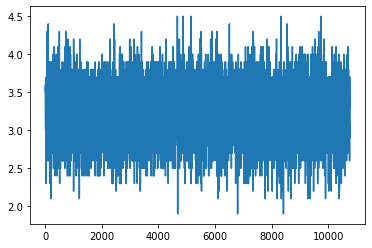

In [237]:
import matplotlib.pyplot as plt
plt.plot(train_y_df)

In [238]:
## 정규화 x
train_x = torch.from_numpy(np.array(train_x_df)).float()
train_y = torch.from_numpy(train_y_df.to_numpy()).float()

test_x = torch.from_numpy(np.array(test_x_df)).float()
test_y = torch.from_numpy(test_y_df.to_numpy()).float()

In [239]:
train_x, test_x

(tensor([[-379.9641,  109.6895,    8.4093,  ...,    1.9740,   -3.6598,
            -1.2474],
         [-316.1651,   96.1986,  -13.8743,  ...,   10.3205,    7.6748,
             4.1148],
         [-354.9322,  124.6229,   13.3427,  ...,    2.8094,   -0.6289,
             3.4896],
         ...,
         [-333.7809,   95.9899,  -14.8328,  ...,   19.1041,    6.3907,
             4.5914],
         [-339.6773,  118.4698,   10.6636,  ...,    4.2440,    0.8341,
             1.1397],
         [-347.9869,  119.5096,   -8.2922,  ...,    6.0540,    9.3821,
             3.9468]]),
 tensor([[-336.9851,  106.8033,    4.5349,  ...,    8.9879,    5.9921,
             4.6221],
         [-337.9043,  105.4469,   11.3103,  ...,   -1.1719,   -4.0991,
            -1.5880],
         [-419.5555,  125.5558,   18.3917,  ...,    1.0848,   -0.5761,
             0.6626],
         ...,
         [-371.5176,  117.5567,    5.4989,  ...,    0.7992,   -2.3674,
             0.9826],
         [-375.5778,  106.7169,    2.852

## Normalization

In [171]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
scaler.fit(np.array(train_x_df))
# # ### 다 0으로 초기화됨
normalized_train_data = scaler.transform(np.array(train_x_df))
normalized_test_data = torch.tensor( scaler.transform(np.array(test_x_df))).float()
normalized_train_data

array([[0.7807, 0.6002, 0.5256, ..., 0.3406, 0.2676, 0.265 ],
       [0.847 , 0.5264, 0.3587, ..., 0.5966, 0.6359, 0.4704],
       [0.8067, 0.682 , 0.5625, ..., 0.3662, 0.3661, 0.4465],
       ...,
       [0.8287, 0.5253, 0.3515, ..., 0.8661, 0.5941, 0.4887],
       [0.8225, 0.6483, 0.5424, ..., 0.4102, 0.4136, 0.3564],
       [0.8139, 0.654 , 0.4005, ..., 0.4658, 0.6913, 0.464 ]])

In [94]:
## 정규화 0
norm_train_x = torch.from_numpy(normalized_train_data).float()
train_y = torch.from_numpy(train_y_df.to_numpy()).float()

norm_test_x = torch.from_numpy(normalized_test_data).float()
test_y = torch.from_numpy(test_y_df.to_numpy()).float()

In [240]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
#         out, _ = self.lstm(x, (h0, c0))
#         out = self.fc(out[:, -1, :])
        out, (hidden_state, cell_state) = self.lstm(x, (h0, c0))
        output = self.fc(out[:,-1,:])
        hidden = self.fc(hidden_state[-1])
        return output, hidden,  out[:,-1,:]

## Grid search

In [241]:
# define the function to calculate CCC
def compute_ccc(y_true, y_pred):
    mu_true = np.mean(y_true)
    mu_pred = np.mean(y_pred)
    var_true = np.var(y_true)
    var_pred = np.var(y_pred)
    std_true = np.std(y_true)
    std_pred = np.std(y_pred)

    rho = np.corrcoef(y_true, y_pred)[0,1]

    num = 2 * rho * std_true * std_pred
    denom = var_true + var_pred + (mu_true - mu_pred)**2

    ccc = num / denom
    return ccc

In [242]:
from sklearn.model_selection import KFold
# from sklearn.metrics import average_precision_score
input_size = 32
learning_rate = 0.0001
hidden_sizes = [64]
num_layerss = [3,4,5]
num_epochss = [100,200,300,400]

num_folds = 3
kf = KFold(n_splits=num_folds)
criterion = nn.MSELoss()
results = []
min_ccc = 0
for hidden_size in hidden_sizes:
    for num_layers in num_layerss:
        for num_epochs in num_epochss:
            # initialize model and optimizer
            model = LSTM(input_size, hidden_size, num_layers, output_size)
            optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
            # train and evaluate using cross-validation
            fold_results = []
            for train_idx, val_idx in kf.split(norm_train_x):
                train_x_fold, train_y_fold = norm_train_x[train_idx], train_y[train_idx]
                val_x_fold, val_y_fold = norm_train_x[val_idx], train_y[val_idx]
                for epoch in range(num_epochs):
                    model.train()
                    outputs,_,_ = model(train_x_fold.unsqueeze(1))
                    loss = criterion(outputs, train_y_fold)
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                model.eval()
                with torch.no_grad():
                    val_outputs,_,_ = model(val_x_fold.unsqueeze(1))
                    val_loss = criterion(val_outputs, val_y_fold)
                    val_predictions = val_outputs.detach().numpy().flatten()
                    val_targets = val_y_fold.detach().numpy().flatten()
                    ccc = compute_ccc(val_targets, val_predictions)
                    fold_results.append((val_loss.item(), ccc))
                    if ccc > min_ccc :
                        min_ccc = ccc
                        print(f'min_ccc: {min_ccc}') 
                        torch.save(model.state_dict(), f'./model/lstm_arousal_model_best.pt')
            # compute average performance over folds
            avg_val_loss = np.mean([x[0] for x in fold_results])
            avg_ccc = np.mean([x[1] for x in fold_results])
            results.append((hidden_size, num_layers, num_epochs, avg_val_loss, avg_ccc))
            # print results for current hyperparameter combination
            print(f"hidden_size={hidden_size}, num_layers={num_layers}, num_epochs={num_epochs}: "
                  f"val_loss={avg_val_loss:.4f}, ccc={avg_ccc:.4f}")



KeyboardInterrupt: 

In [ ]:
# find hyperparameters with best performance
best_results = sorted(results, key=lambda x: x[4], reverse=True)
best_hidden_size, best_num_layers, best_num_epochs, _, best_ccc = best_results[0]
print(f"Best hyperparameters: hidden_size={best_hidden_size}, num_layers={best_num_layers}, "
      f"num_epochs={best_num_epochs}, ccc={best_ccc:.4f}")

In [256]:
input_size = 32
hidden_size = 64 # 64
num_layers = 3 # 3
output_size = 1
learning_rate = 0.001
num_epochs = 400
# model = LSTM(input_size, hidden_size, num_layers, output_size)
# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [257]:
model = LSTM(input_size, hidden_size, num_layers, output_size)
criterion = nn.L1Loss() # maeloss
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [260]:
from tqdm.notebook import tqdm
min_ccc =0
for epoch in tqdm(range(num_epochs), desc='Training', unit='epoch'):
    model.train()
    outputs,_,_ = model(train_x.unsqueeze(1))
    loss = criterion(outputs, train_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    tqdm.write('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))
    model.eval()
    with torch.no_grad():
        test_predict, test_hidden, test_out = model(test_x.unsqueeze(1))
        ccc = compute_ccc(test_y.numpy(),test_predict.squeeze(1).numpy())
        if ccc > min_ccc :
                min_ccc = ccc
                print(f'min_ccc: {min_ccc}') 
                torch.save(model.state_dict(), f'./model/lstm_arousal_model_best.pt')


Training:   0%|          | 0/400 [00:00<?, ?epoch/s]

Epoch [1/400], Loss: 3.2987
min_ccc: 1.563341874252848e-05
Epoch [2/400], Loss: 3.2885
Epoch [3/400], Loss: 3.2783
Epoch [4/400], Loss: 3.2678
Epoch [5/400], Loss: 3.2569
Epoch [6/400], Loss: 3.2458
Epoch [7/400], Loss: 3.2342
Epoch [8/400], Loss: 3.2222
Epoch [9/400], Loss: 3.2096
Epoch [10/400], Loss: 3.1964
Epoch [11/400], Loss: 3.1825
min_ccc: 1.8239612068025745e-05
Epoch [12/400], Loss: 3.1677
min_ccc: 2.427377832081409e-05
Epoch [13/400], Loss: 3.1520
min_ccc: 3.1112620192044384e-05
Epoch [14/400], Loss: 3.1352
min_ccc: 3.849262068648767e-05
Epoch [15/400], Loss: 3.1171
min_ccc: 4.6036604604635296e-05
Epoch [16/400], Loss: 3.0976
min_ccc: 5.313901783663325e-05
Epoch [17/400], Loss: 3.0762
min_ccc: 5.891318308216262e-05
Epoch [18/400], Loss: 3.0529
min_ccc: 6.22884431847613e-05
Epoch [19/400], Loss: 3.0273
Epoch [20/400], Loss: 2.9991
Epoch [21/400], Loss: 2.9680
Epoch [22/400], Loss: 2.9336
Epoch [23/400], Loss: 2.8956
Epoch [24/400], Loss: 2.8537
Epoch [25/400], Loss: 2.8075
Epo

Epoch [247/400], Loss: 0.2569
Epoch [248/400], Loss: 0.2570
Epoch [249/400], Loss: 0.2569
Epoch [250/400], Loss: 0.2569
Epoch [251/400], Loss: 0.2569
Epoch [252/400], Loss: 0.2569
Epoch [253/400], Loss: 0.2569
Epoch [254/400], Loss: 0.2569
Epoch [255/400], Loss: 0.2569
Epoch [256/400], Loss: 0.2569
Epoch [257/400], Loss: 0.2569
Epoch [258/400], Loss: 0.2569
Epoch [259/400], Loss: 0.2569
Epoch [260/400], Loss: 0.2569
Epoch [261/400], Loss: 0.2569
Epoch [262/400], Loss: 0.2569
Epoch [263/400], Loss: 0.2569
Epoch [264/400], Loss: 0.2569
Epoch [265/400], Loss: 0.2569
Epoch [266/400], Loss: 0.2569
Epoch [267/400], Loss: 0.2569
Epoch [268/400], Loss: 0.2569
Epoch [269/400], Loss: 0.2569
Epoch [270/400], Loss: 0.2569
Epoch [271/400], Loss: 0.2569
Epoch [272/400], Loss: 0.2569
Epoch [273/400], Loss: 0.2569
Epoch [274/400], Loss: 0.2569
Epoch [275/400], Loss: 0.2569
Epoch [276/400], Loss: 0.2569
Epoch [277/400], Loss: 0.2569
Epoch [278/400], Loss: 0.2569
Epoch [279/400], Loss: 0.2569
Epoch [280

In [261]:
arousal_model = LSTM(input_size, hidden_size, num_layers, output_size)
arousal_model.load_state_dict(torch.load('./model/lstm_arousal_model_best.pt'))

<All keys matched successfully>

In [262]:
arousal_model.eval()
with torch.no_grad():
    train_predict, train_hidden, train_out  = arousal_model(train_x.unsqueeze(1))
    test_predict, test_hidden, test_out = arousal_model(test_x.unsqueeze(1))
    train_loss = criterion(train_predict, train_y)
    test_loss = criterion(test_predict, test_y)
    
    ccc = compute_ccc(test_y.numpy(),test_predict.squeeze(1).numpy())

    print('Train Loss: {:.4f}'.format(train_loss.item()))
    print('Test Loss: {:.4f}'.format(test_loss.item()))
    print('ccc: {:.4f}'.format(ccc))
    print('Predictions: ', test_predict)
    print(test_y)
    print(f'Extracting 64 sized features: {test_out}') # 64 sized feature 뽑아냄
    print(f'shape: {test_out.shape}')
    
    '''
    epoch: 700
    lr = 0.00005
    Train Loss: 0.1392
Test Loss: 0.1392
ccc: -0.0818


    2) MAE
    learning_rate = 0.001
    num_epochs = 100
    Train Loss: 0.2581
    Test Loss: 0.2581
    ccc: 0.0448
    
    3) MAE LOSS
    learning_rate = 0.0001
    num_epochs = 400
    Train Loss: 0.2593
    Test Loss: 0.2593
    ccc: 0.0308
    
    '''

Train Loss: 0.2653
Test Loss: 0.2681
ccc: 0.0731
Predictions:  tensor([[3.2145],
        [3.1883],
        [3.1634],
        ...,
        [3.1854],
        [3.2164],
        [3.1432]])
tensor([3.5000, 3.4000, 3.0000,  ..., 3.4000, 2.6000, 3.3000])
Extracting 64 sized features: tensor([[ 0.4634,  0.5490, -0.4754,  ..., -0.2010, -0.4905, -0.4120],
        [ 0.4592,  0.5451, -0.4693,  ..., -0.1997, -0.4868, -0.4081],
        [ 0.4544,  0.5414, -0.4652,  ..., -0.1994, -0.4822, -0.4042],
        ...,
        [ 0.4592,  0.5447, -0.4682,  ..., -0.1995, -0.4867, -0.4077],
        [ 0.4636,  0.5498, -0.4745,  ..., -0.2014, -0.4909, -0.4123],
        [ 0.4487,  0.5384, -0.4630,  ..., -0.1989, -0.4776, -0.4022]])
shape: torch.Size([2693, 64])


In [229]:
train_loss.item(), test_loss.item()

(0.2569015324115753, 0.2569015324115753)

In [ ]:
# %cd ..

In [43]:
%pwd

'/workspace/EmotionShortForm'

In [44]:
# import pickle

# filename = './model/lstm_arousal_model.pkl'
# pickle.dump(model, open(filename,'wb'))


# Save model
import torch

torch.save(model.state_dict(), './model/lstm_arousal_model.pt')

## model evaluation

In [14]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
#         out, _ = self.lstm(x, (h0, c0))
#         out = self.fc(out[:, -1, :])
        out, (hidden_state, cell_state) = self.lstm(x, (h0, c0))
        output = self.fc(out[:,-1,:])
        hidden = self.fc(hidden_state[-1])
        return output, hidden,  out[:,-1,:]
input_size = 32
hidden_size = 64 # 64
num_layers = 3 # 3
output_size = 1
learning_rate = 0.001
num_epochs = 250

arousal_model = LSTM(input_size, hidden_size, num_layers, output_size)
arousal_model.load_state_dict(torch.load('./model/lstm_arousal_model.pt'))


<All keys matched successfully>

In [17]:
arousal_model.eval()
with torch.no_grad():
    train_predict, train_hidden, train_out  = arousal_model(train_x.unsqueeze(1))
    test_predict, test_hidden, test_out = arousal_model(test_x.unsqueeze(1))
    train_loss = criterion(train_predict, train_y)
    test_loss = criterion(test_predict, test_y)
    ccc = compute_ccc(test_y.numpy(),test_predict.squeeze(1).numpy())

    print('Train Loss: {:.4f}'.format(train_loss.item()))
    print('Test Loss: {:.4f}'.format(test_loss.item()))
    print('ccc: {:.4f}'.format(ccc))
    print('Predictions: ', test_predict)
    print(f'Extracting 64 sized features: {test_out}') # 64 sized feature 뽑아냄
    print(f'shape: {test_out.shape}')

Train Loss: 7.7877
Test Loss: 7.7877
ccc: -0.0001
Predictions:  tensor([[0.4719],
        [0.4625],
        [0.4720],
        ...,
        [0.4845],
        [0.4664],
        [0.4603]])
Extracting 64 sized features: tensor([[ 0.0734, -0.0814,  0.0662,  ..., -0.0451,  0.0446, -0.0772],
        [ 0.0720, -0.0796,  0.0650,  ..., -0.0442,  0.0437, -0.0755],
        [ 0.0734, -0.0815,  0.0664,  ..., -0.0459,  0.0447, -0.0770],
        ...,
        [ 0.0754, -0.0828,  0.0683,  ..., -0.0469,  0.0477, -0.0790],
        [ 0.0726, -0.0804,  0.0656,  ..., -0.0451,  0.0437, -0.0760],
        [ 0.0718, -0.0795,  0.0648,  ..., -0.0444,  0.0433, -0.0753]])
shape: torch.Size([10769, 64])
